In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter('ignore')

# Load dataset
ds = pd.read_csv("../data/vgsales.csv")

In [3]:
categorical_columns = ds.select_dtypes(include=['object']).columns
# categorical_columns

In [4]:
map_dicts = dict()
for column in categorical_columns:
    ds[column] = ds[column].astype('category')
    map_dicts[column] = dict(zip(ds[column], ds[column].cat.codes))
    ds[column] = ds[column].cat.codes

In [5]:
display(ds.sample(15))

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7288,7421,650,15,1996.0,7,446,0.00,0.00,0.20,0.01,0.21
9309,9480,9150,4,2007.0,7,63,0.07,0.00,0.05,0.01,0.13
5360,5446,3245,28,2008.0,8,288,0.15,0.14,0.00,0.04,0.33
6906,7030,204,4,2006.0,11,487,0.19,0.02,0.00,0.02,0.23
12618,12849,7392,4,2008.0,10,6,0.04,0.01,0.00,0.00,0.05
1731,1753,5665,23,1993.0,4,85,0.57,0.08,0.50,0.01,1.16
5232,5318,10674,28,2011.0,2,487,0.18,0.14,0.00,0.03,0.35
12102,12324,7008,4,2007.0,11,524,0.00,0.06,0.00,0.01,0.06
4881,4959,9918,6,2005.0,9,138,0.28,0.10,0.00,0.01,0.39
9687,9869,8101,17,2014.0,7,120,0.03,0.05,0.02,0.02,0.12


# Model tuning


https: // en.wikipedia.org / wiki / Hyperparameter_optimization
#### Parameters vs Hyperparameters

In [5]:
y_column = 'Global_Sales'

X_columns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

X = ds[X_columns]
y = ds[y_column]

In [6]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
# In the first step we will split the data in training and remaining dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)
y_test = np.ravel(y_test)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13032, 10)
(13032,)
(3259, 10)
(3259,)


In [7]:
rf = RandomForestRegressor(max_features=5, n_estimators=100)

In [8]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [9]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_absolute_percentage_error(y_test, y_pred))

0.023781926971463675
0.0045333763920883995


In [10]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 5,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Assume X_train, y_train are defined elsewhere

# Update the parameter grid for a regressor
param_grid = {
    'n_estimators': np.arange(25, 55, 10),
    'max_features': [0.5, 0.6, 0.8],
    'min_samples_split': [10, 15],
    'min_samples_leaf': [3, 4],
    'bootstrap': [False]
}

# Setup scorer for regression
scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Create the regressor
rf = RandomForestRegressor()

# Setup GridSearchCV
grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring=scorer, cv=5, verbose=3, return_train_score=True)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.007, test=-0.004) total time=   0.5s
[CV 2/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.005, test=-0.016) total time=   0.5s
[CV 3/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.009, test=-0.037) total time=   0.4s
[CV 4/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.008, test=-0.021) total time=   0.5s
[CV 5/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=25;, score=(train=-0.008, test=-0.018) total time=   0.4s
[CV 1/5] END bootstrap=False, max_features=0.5, min_samples_leaf=3, min_samples_split=10, n_estimators=35;, score=(train=-0.007, test

In [42]:
from sklearn.metrics import accuracy_score

grid_results = pd.concat([pd.DataFrame(grid.cv_results_["params"]),
                          pd.DataFrame(grid.cv_results_["mean_test_score"], 
                          columns=["precision"])],
                          axis=1)

grid_results

,bootstrap,max_features,min_samples_leaf,min_samples_split,n_estimators,precision
0,False,0.5,3,10,25,-0.019352
1,False,0.5,3,10,35,-0.022326
2,False,0.5,3,10,45,-0.017777
3,False,0.5,3,15,25,-0.032477
4,False,0.5,3,15,35,-0.025802
5,False,0.5,3,15,45,-0.029275
6,False,0.5,4,10,25,-0.018691
7,False,0.5,4,10,35,-0.018180
8,False,0.5,4,10,45,-0.019904
9,False,0.5,4,15,25,-0.028750


In [43]:
grid_results.columns

Index(['bootstrap', 'max_features', 'min_samples_leaf', 'min_samples_split',
       'n_estimators', 'precision'],
      dtype='object')

In [44]:
grid_contour = grid_results.groupby([  'max_features', 'min_samples_leaf',
       'min_samples_split', 'n_estimators']).mean()
grid_contour

bootstrap  \
max_features min_samples_leaf min_samples_split n_estimators              
0.5          3                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
             4                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
0.6          3                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
             4                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
0.8          3                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
             4                10                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   
                              15                25                  0.0   
                                                35                  0.0   
                                                45                  0.0   

                                                              precision  
max_features min_samples_leaf min_samples_split n_estimators             
0.5          3                10                25            -0.019352  
                                                35            -0.022326  
                                                45            -0.017777  
                              15                25            -0.032477  
                                                35            -0.025802  
                                                45            -0.029275  
             4                10                25            -0.018691  
                                                35            -0.018180  
                                                45            -0.019904  
                              15                25            -0.028750  
                                                35            -0.029129  
                                                45            -0.022938  
0.6          3                10                25            -0.016031  
                                                35            -0.016597  
                           

In [45]:
from sklearn.datasets import make_blobs

# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

In [46]:
X.head()

,VarA,VarB
1,-0.650916,0.318502
2,1.464931,1.598226
7,3.385297,-0.575884
8,-2.475452,1.170645
9,-2.797628,1.138043


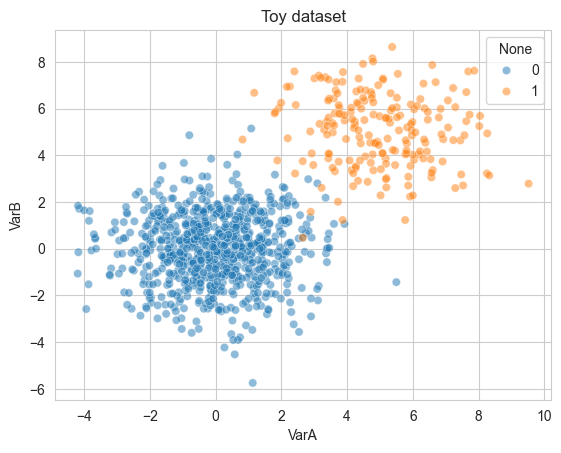

In [47]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [48]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(
    sampling_strategy='auto', # samples only the minority class
    random_state=0,  # for reproducibility
)  

X_res, y_res = ros.fit_resample(X, y)

In [49]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [50]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [51]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

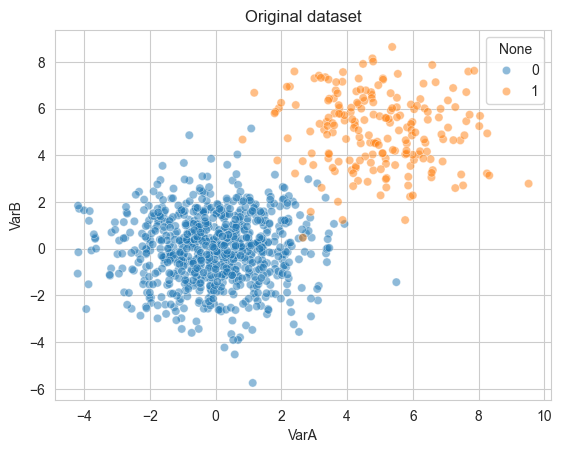

In [52]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

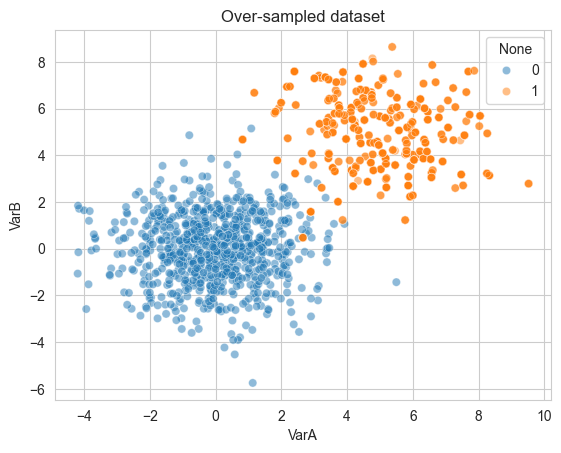

In [53]:
# plot of resampled data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

# SMOTE

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

In [55]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

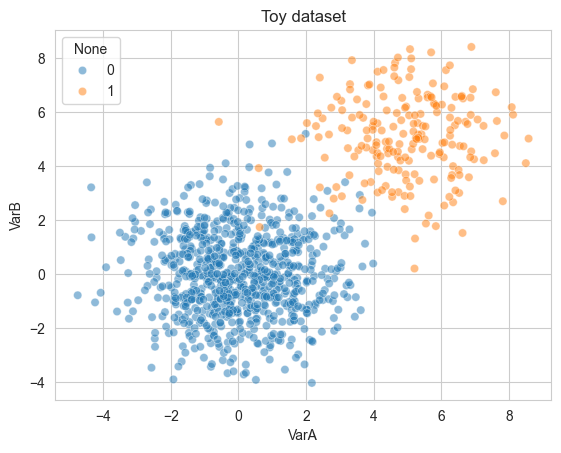

In [56]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

In [57]:
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    n_jobs=4
)

X_res, y_res = sm.fit_resample(X, y)

In [58]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [59]:
# size of undersampled data

X_res.shape, y_res.shape

((1600, 2), (1600,))

In [60]:
# number of minority class observations

y.value_counts(), y_res.value_counts()

(0    800
 1    200
 Name: count, dtype: int64,
 0    800
 1    800
 Name: count, dtype: int64)

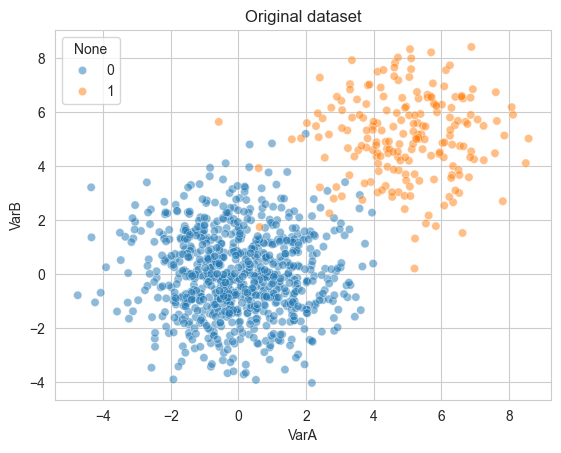

In [61]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

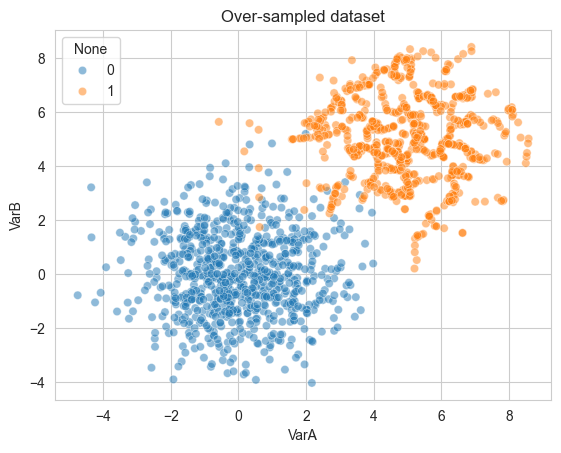

In [62]:
# plot of original data

sns.scatterplot(
    data=X_res, x="VarA", y="VarB", hue=y_res, alpha=0.5
)

plt.title('Over-sampled dataset')
plt.show()

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import RandomUnderSampler

In [64]:
def make_data(sep):
    
    # returns arrays
    X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           weights=[0.99],
                           class_sep=sep,# how separate the classes are
                           random_state=1)
    
    # trasform arrays into pandas df and series
    X = pd.DataFrame(X, columns =['varA', 'varB'])
    y = pd.Series(y)
    
    return X, y

0    983
1     17
Name: count, dtype: int64


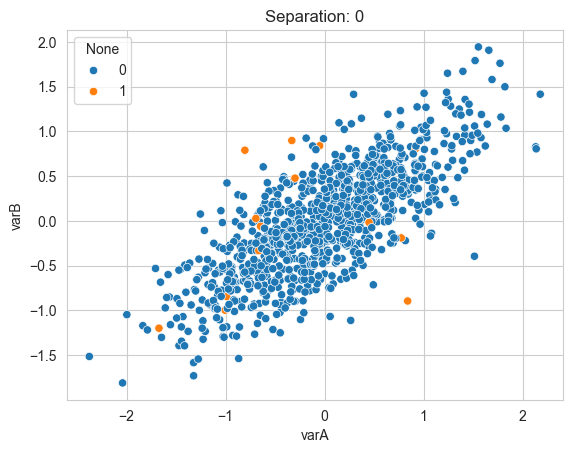

0    983
1     17
Name: count, dtype: int64


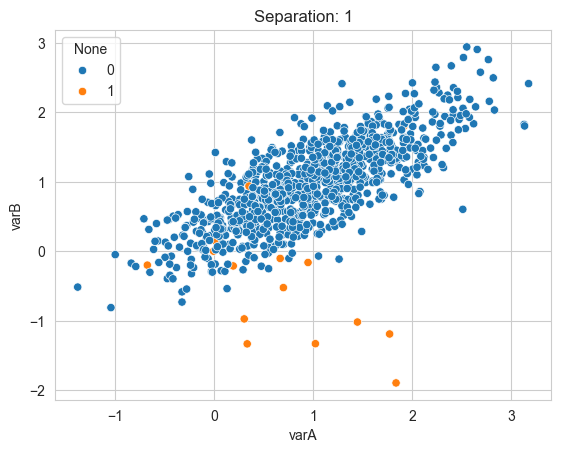

0    983
1     17
Name: count, dtype: int64


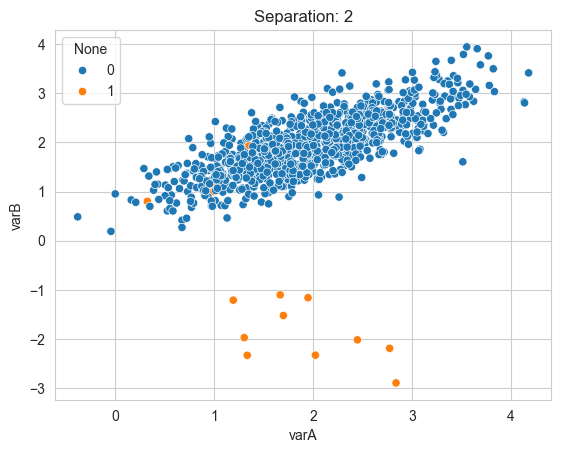

In [65]:
# make datasets with different class separateness
# and plot

for sep in [0, 1, 2]:
    
    X, y = make_data(sep)
    
    print(y.value_counts())
    
    sns.scatterplot(
        data=X, x="varA", y="varB", hue=y
    )
    
    plt.title('Separation: {}'.format(sep))
    plt.show()

In [66]:
# create data

X, y = make_data(sep=2)

# set up the random undersampling class

rus = RandomUnderSampler(
    sampling_strategy='auto',  # samples only the majority class
    random_state=0,  # for reproducibility
    replacement=True # if it should resample with replacement
)  

X_resampled, y_resampled = rus.fit_resample(X, y)

In [67]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [68]:
# size of undersampled data

X_resampled.shape, y_resampled.shape

((34, 2), (34,))

In [69]:
# number of minority class observations

y.value_counts()

0    983
1     17
Name: count, dtype: int64

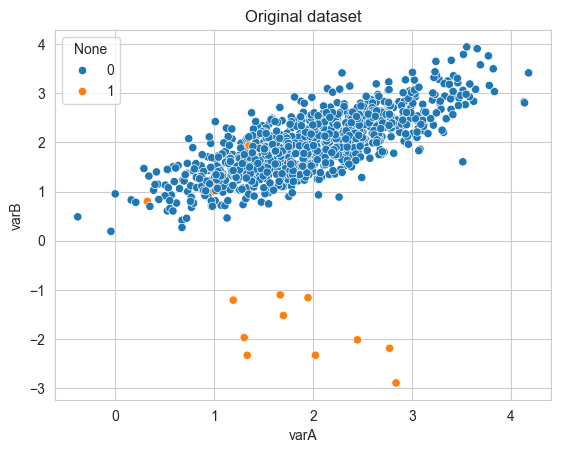

In [70]:
# plot of original data

sns.scatterplot(
    data=X, x="varA", y="varB", hue=y
)

plt.title('Original dataset')
plt.show()

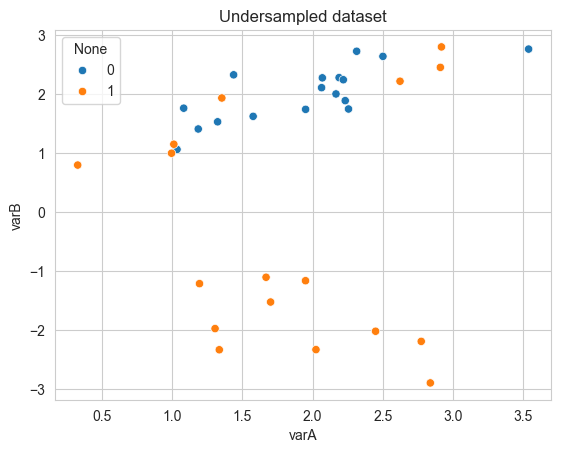

In [71]:
# plot undersampled data

sns.scatterplot(
    data=X_resampled, x="varA", y="varB", hue=y_resampled
)

plt.title('Undersampled dataset')
plt.show()